In [6]:
import pandas as pa
import seaborn as sns
import nltk
import regex as re
from collections import Counter
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [11]:
df = pa.read_csv('tip.csv')

In [12]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [14]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [16]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


## Check for Null

In [20]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [21]:
df['Review']=df['Review'].str.upper()

In [25]:
df[df['Review'].str.contains('HOTEL')]

,Review,Rating
0,NICE HOTEL EXPENSIVE PARKING GOT GOOD DEAL STA...,4
1,OK NOTHING SPECIAL CHARGE DIAMOND MEMBER HILTO...,2
2,NICE ROOMS NOT 4* EXPERIENCE HOTEL MONACO SEAT...,3
3,"UNIQUE, GREAT STAY, WONDERFUL TIME HOTEL MONAC...",5
4,"GREAT STAY GREAT STAY, WENT SEAHAWK GAME AWESO...",5
...,...,...
20485,NOT IMPRESSED UNFRIENDLY STAFF CHECKED ASKED H...,2
20487,GREAT LOCATION PRICE VIEW HOTEL GREAT QUICK PL...,4
20488,"OK JUST LOOKS NICE MODERN OUTSIDE, DESK STAFF ...",2
20489,HOTEL THEFT RUINED VACATION HOTEL OPENED SEPT ...,1


In [27]:
df['length']=df['Review'].str.len()
df.describe()

,Rating,length
count,20491.000000,20491.000000
mean,3.952223,724.896833
std,1.233030,689.101024
min,1.000000,44.000000
25%,3.000000,339.000000
50%,4.000000,537.000000
75%,5.000000,859.000000
max,5.000000,13501.000000


<Axes: >

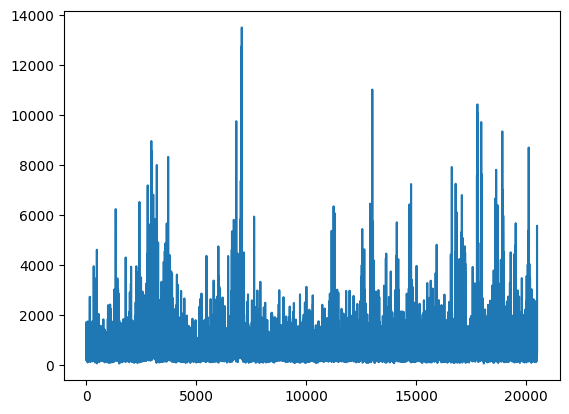

In [28]:
df['length'].plot()

<Axes: >

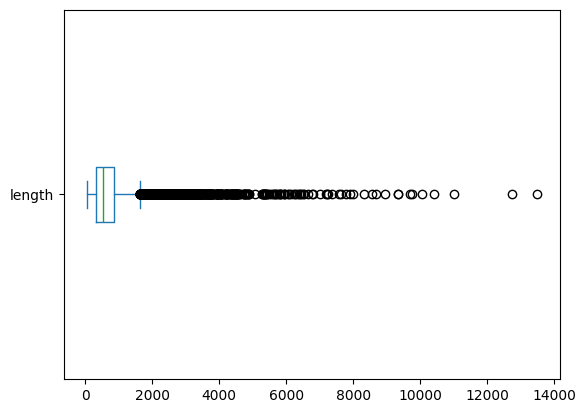

In [29]:
df['length'].plot(kind='box', vert=False)

## Histogram

<Axes: ylabel='Frequency'>

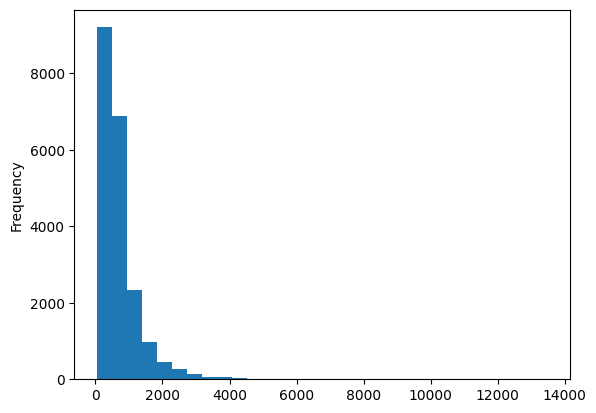

In [33]:
df['length'].plot(kind='hist', bins=30)

# Tokenization

In [34]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'but', 're', 'hers', 'our', 'than', "weren't", 'very', 'themselves', "won't", 'don', 'did', "didn't", 'hadn', "mightn't", 'all', 'other', 'doesn', "shan't", 'will', 'yourselves', 'its', 'before', 'while', 'some', "aren't", 'll', 'if', 'now', 'both', 'with', 'how', 'weren', 'shan', 'no', 'we', 'had', "she's", 'these', 'y', 'in', 'down', 'o', "that'll", 'been', "mustn't", 'off', 've', 'it', 'having', 'into', 'just', 'whom', 'because', 'mustn', 's', 'shouldn', 'there', 'such', 'm', "you're", 'd', 'so', 'should', 'those', 'from', 'the', 'my', 'few', 't', 'were', 'not', 'at', 'why', 'myself', 'out', "doesn't", 'own', 'theirs', 'until', 'yourself', 'i', 'once', 'wasn', "should've", 'further', 'they', 'ours', 'more', 'against', 'above', 'under', 'be', 'which', "shouldn't", 'then', "couldn't", 'their', 'couldn', 'herself', 'about', 'who', 'mightn', "haven't", 'after', 'ain', 'them', 'you', "it's", 'him', 'ma', 'was', 'by', "don't", 'his', "isn't", 'during', 'to', 'are', 'too', "needn't", 'as'

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [35]:
def tokenize(Review):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Review)

In [36]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
testtokens = tokenize(testtext)

In [37]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


In [38]:
pipeline = [str.lower, tokenize, remove_stop]

In [39]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [40]:
df['tokens'] = df['Review'].apply(prepare, pipeline=pipeline)

In [41]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,Review,Rating,length,tokens,num_tokens
20486,"BEST KEPT SECRET 3RD TIME STAYING CHARM, NOT 5...",5,733,"[best, kept, secret, 3rd, time, staying, charm...",107
20487,GREAT LOCATION PRICE VIEW HOTEL GREAT QUICK PL...,4,306,"[great, location, price, view, hotel, great, q...",43
20488,"OK JUST LOOKS NICE MODERN OUTSIDE, DESK STAFF ...",2,443,"[ok, looks, nice, modern, outside, desk, staff...",62
20489,HOTEL THEFT RUINED VACATION HOTEL OPENED SEPT ...,1,5557,"[hotel, theft, ruined, vacation, hotel, opened...",740
20490,"PEOPLE TALKING, CA N'T BELIEVE EXCELLENT RATIN...",2,620,"[people, talking, ca, n, believe, excellent, r...",86


# Word Frequency Analysis

In [42]:
tokens = tokenize("She likes my cats and my cats like my sofa.")
testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [43]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [44]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('hotel', 49699), ('room', 35017), ('great', 21418), ('n', 19090), ('good', 17323)]


In [45]:
freq_df = pa.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [46]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
hotel,49699
room,35017
great,21418
n,19090
good,17323
staff,16604
stay,15383
nice,12609
rooms,12359


In [47]:
freq_df.describe()

,freq
count,58285.000000
mean,34.770164
std,398.715946
min,1.000000
25%,1.000000
50%,1.000000
75%,5.000000
max,49699.000000


## Bar Chart

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

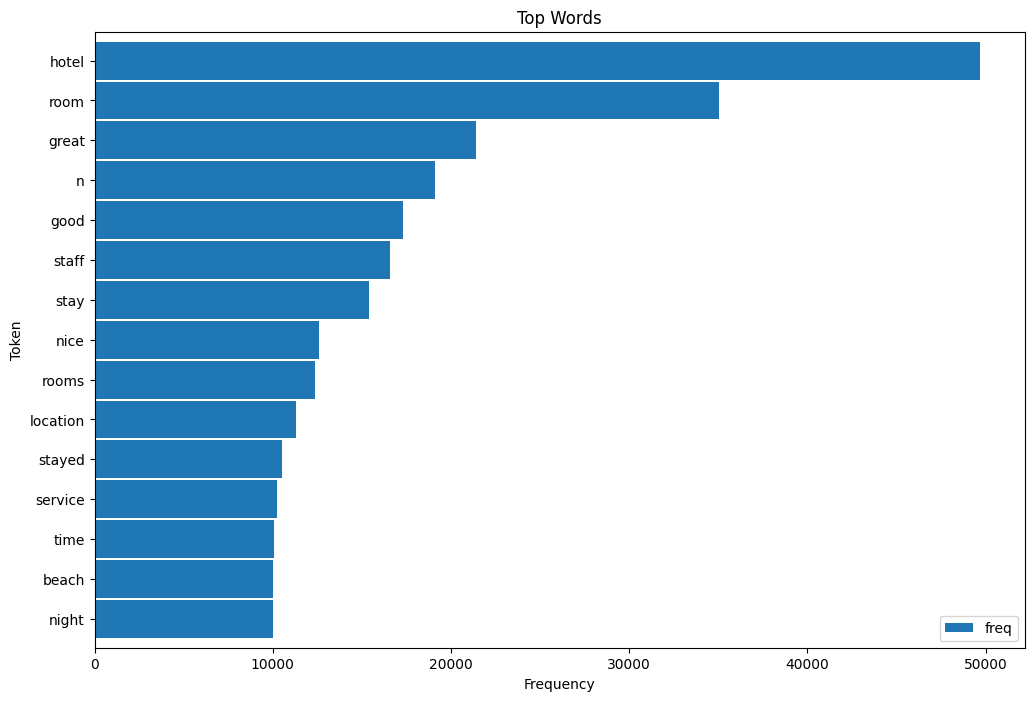

In [48]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [49]:
review = df.query("Rating>3")['Review'].values[0]

In [50]:
review

'NICE HOTEL EXPENSIVE PARKING GOT GOOD DEAL STAY HOTEL ANNIVERSARY, ARRIVED LATE EVENING TOOK ADVICE PREVIOUS REVIEWS DID VALET PARKING, CHECK QUICK EASY, LITTLE DISAPPOINTED NON-EXISTENT VIEW ROOM ROOM CLEAN NICE SIZE, BED COMFORTABLE WOKE STIFF NECK HIGH PILLOWS, NOT SOUNDPROOF LIKE HEARD MUSIC ROOM NIGHT MORNING LOUD BANGS DOORS OPENING CLOSING HEAR PEOPLE TALKING HALLWAY, MAYBE JUST NOISY NEIGHBORS, AVEDA BATH PRODUCTS NICE, DID NOT GOLDFISH STAY NICE TOUCH TAKEN ADVANTAGE STAYING LONGER, LOCATION GREAT WALKING DISTANCE SHOPPING, OVERALL NICE EXPERIENCE HAVING PAY 40 PARKING NIGHT,  '

# WordCloud

(-0.5, 399.5, 199.5, -0.5)

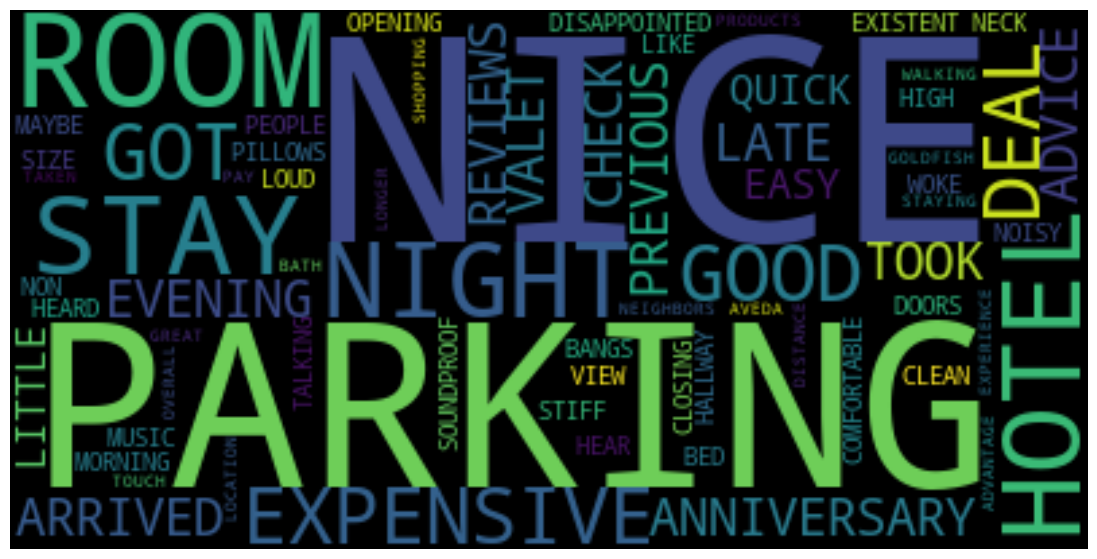

In [52]:
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(review)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

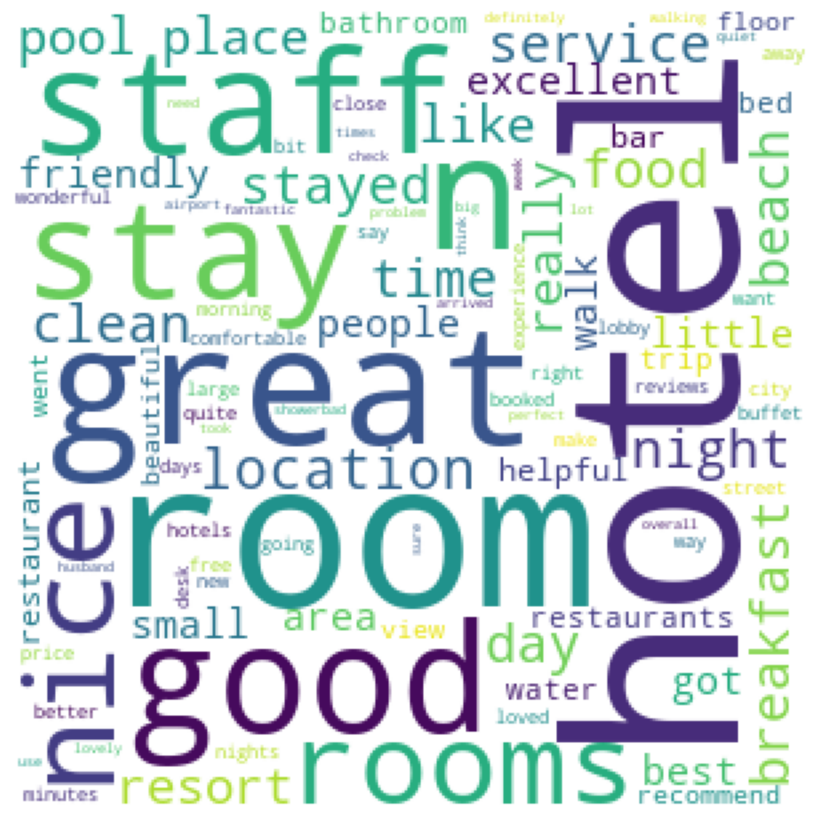

In [53]:
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()